In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [6]:
movies = pd.read_csv('/content/drive/MyDrive/Projects/Netflix Movies/netflix_titles.csv')

In [7]:
df = movies.copy()
df.set_index('show_id', inplace=True)

Looking top 5 rows with head()

In [9]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Information about dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


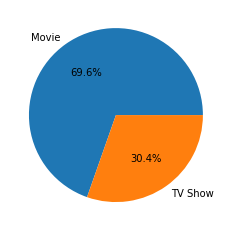

In [12]:
labels = list(df['type'].value_counts().index)
plt.pie(df['type'].value_counts(), labels=labels, autopct='%1.1f%%');

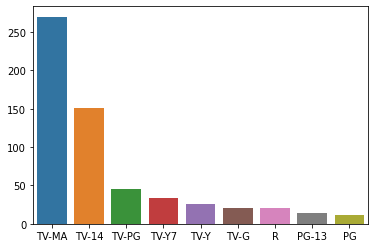

In [13]:
sns.barplot(x = df.loc[df['release_year'] == 2021, 'rating'].value_counts().index, y = df.loc[df['release_year'] == 2021, 'rating'].value_counts().values);

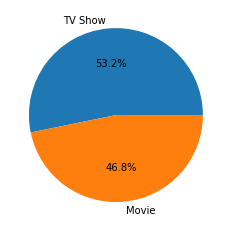

In [14]:
labels = list(df.loc[df['release_year'] == 2021, 'type'].value_counts().index)
plt.pie(df.loc[df['release_year'] == 2021, 'type'].value_counts(), labels=labels, autopct='%1.1f%%');

In [61]:
top_5_director = df.groupby('director')[['title']].count().sort_values(by='title', ascending=False)[ : 5]
top_5_director.columns = ["Number of movies/tv shows"]
top_5_director.reset_index(inplace=True)
top_5_director

,director,Number of movies/tv shows
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14


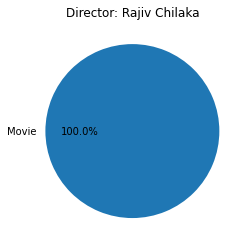

In [62]:
labels = list(df.loc[df['director'] == top_5_director.loc[0, 'director'], 'type'].value_counts().index)
plt.pie(df.loc[df['director'] == top_5_director.loc[0, 'director'], 'type'].value_counts(), labels=labels, autopct='%1.1f%%');
plt.title(f"Director: {top_5_director.loc[0, 'director']}");

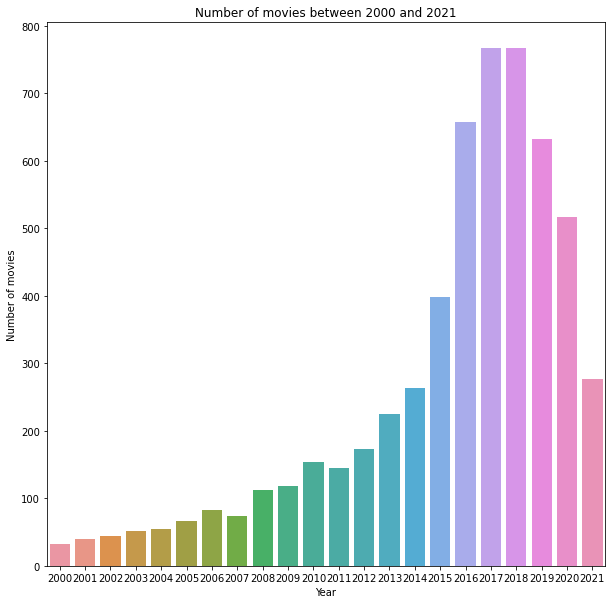

In [78]:
plt.figure(figsize=(10, 10));
movies_from_2000_to_2021 = df.loc[((df['release_year'] >= 2000) & (df['type'] == 'Movie')), ['type', 'release_year']].groupby(['release_year']).count()
values = []
for i in movies_from_2000_to_2021.values:
  for i in i:
    values.append(i)
sns.barplot(y = values, x = movies_from_2000_to_2021.index);
plt.title('Number of movies between 2000 and 2021');
plt.ylabel('Number of movies');
plt.xlabel('Year');

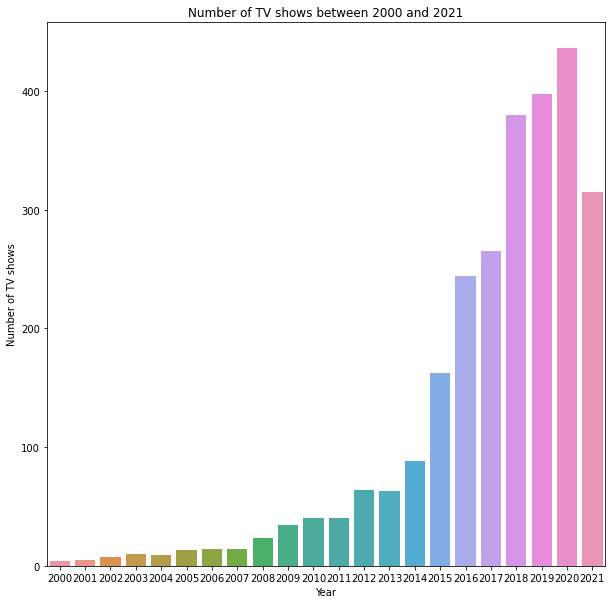

In [77]:
plt.figure(figsize=(10, 10));
movies_from_2000_to_2021 = df.loc[((df['release_year'] >= 2000) & (df['type'] == 'TV Show')), ['type', 'release_year']].groupby(['release_year']).count()
values = []
for i in movies_from_2000_to_2021.values:
  for i in i:
    values.append(i)
sns.barplot(y = values, x = movies_from_2000_to_2021.index);
plt.title('Number of TV shows between 2000 and 2021');
plt.ylabel('Number of TV shows');
plt.xlabel('Year');

In [94]:
top_five_countries = df.loc[:, ['type', 'country']]
top_five_countries.reset_index(inplace=True)
top_five_countries.dropna(inplace=True)

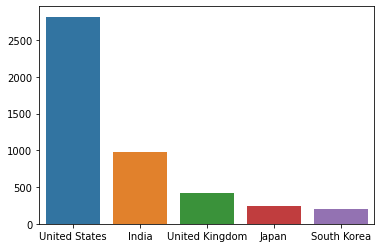

In [110]:
sns.barplot(x = top_five_countries['country'].value_counts()[: 5].index, y = top_five_countries['country'].value_counts()[: 5].values);

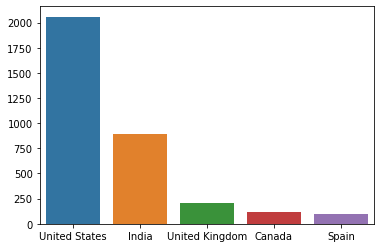

In [112]:
sns.barplot(x = top_five_countries.loc[top_five_countries['type'] == 'Movie','country'].value_counts()[: 5].index, y = top_five_countries.loc[top_five_countries['type'] == 'Movie','country'].value_counts()[: 5].values);

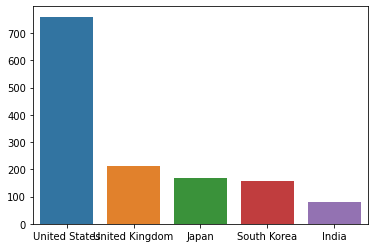

In [113]:
sns.barplot(x = top_five_countries.loc[top_five_countries['type'] == 'TV Show','country'].value_counts()[: 5].index, y = top_five_countries.loc[top_five_countries['type'] == 'TV Show','country'].value_counts()[: 5].values);